In [1]:
# Parameters.
# 
# This notebook allows for controling the dimensions of the fundamental domain
# using parameters a and b:
# 
# b is the ratio of the side lengths within a rectangle (z/x)
# c is the ratio or the entire chamber length to the width of a rectangle (y/x)

In [2]:
from sage.plot.plot3d.shapes import *
from sage.plot.plot3d.shapes2 import Line

In [3]:
def palette(col, n):
    if col == 'red':
        return (1 - n/8,0.2 + n/10,0)
    elif col == 'blue':
        return (0,0.5 + n/10,1 - n/8)

In [10]:
OuterEdges = Sphere(1, opacity=0)


# Dimensions of chamber is (1 x b x c)
b = 1/3 # height
c = 2/3 # length

Faces =  Sphere(0.05, color='black',opacity = 0)
Faces += Sphere(.05, color='white', opacity = 0).translate(0,.005,0)
   
    
Face_1 = polygon3d([[1/2,c/2,b/2], [-1/2,c/2,b/2],[-1/2,b^2/(2*c),b/2],[1/2,b^2/(2*c),b/2]], alpha = 0.9, color='lightgray')
Face_2 = polygon3d([[1/2,b^2/(2*c),b/2],[b/(2*c),b^2/(2*c),b/2],[b/(2*c),-1*b^2/(2*c),b/2],[1/2,-1*b^2/(2*c),b/2]], alpha = 0.9, color='lightgray')
Face_3 = Face_1 + Face_2
Face_4 = Face_3 + Face_3.rotate((0,0,1),math.pi)
Face_5 = Face_4 + Face_4.rotate((1,0,0),math.pi)
Face_6 = polygon3d([[1/2,c/2,b/2],[1/2,c/2,-1*b/2],[1/2,-1*c/2,-1*b/2],[1/2,-1*c/2,b/2]], alpha = 0.9, color='lightgray')
Face_7 = Face_6 + Face_6.rotate((0,1,0),math.pi)
Faces += Face_5 + Face_7

for i in range(2):
    OuterEdges += LineSegment([1/2,c/2,b/2], [-1/2,c/2,b/2], .5, color=palette('blue',2*i)).rotate((0,1,0),i * math.pi)
    OuterEdges += LineSegment([-1/2,c/2,b/2], [-1/2,c/2,-b/2], .5, color=palette('blue',2*i + 1)).rotate((0,1,0),i * math.pi)
    OuterEdges += LineSegment([1/2,-1*c/2,b/2], [-1/2,-1*c/2,b/2], .5, color=palette('red',2*i)).rotate((0,1,0),i * math.pi)
    OuterEdges += LineSegment([-1/2,-1*c/2,b/2],[-1/2,-1*c/2,-1*b/2], .5, color=palette('red',2*i+1)).rotate((0,1,0),i * math.pi)

    
InnerEdges = OuterEdges.rotate((1,0,0),math.pi/2).scale(b/c,b/c,b/c)

Quotient = Faces + InnerEdges + OuterEdges
Quotient.plot()

Graphics3d Object

In [11]:
nested = [Quotient]

for i in range(10):
    nested += [nested[-1].scale(b/c,b/c,b/c).rotate((1,0,0),math.pi/2)]

sum(nested).plot()

Graphics3d Object

In [6]:
import flatsurf
from flatsurf import *

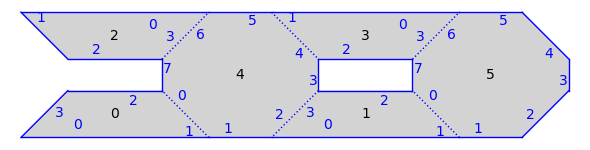

In [14]:
# Here are the FlatSurf graphs with parameters.

s = Surface_list(QQ)

P1 = flatsurf.polygons(vertices = [(0,0),(1,0),((c+b)/(2*c),(c*c - b*b)/(2*c)),((c-b)/(2*c),(c*c - b*b)/(2*c))])

p0 = ((c+b)/(2*c),(c*c - b*b)/(2*c))
p1 = (1,0)
p2 = (1+b,0)
p3 = (1+b+(c-b)/(2*c),(c*c - b*b)/(2*c))
p4 = (1+b+(c-b)/(2*c), c - (c*c - b*b)/(2*c))
p5 = (1+b,c)
p6 = (1,c)
p7 = ((c+b)/(2*c),c - (c*c - b*b)/(2*c))

P2 = flatsurf.polygons(vertices = [p0,p1,p2,p3,p4,p5,p6,p7])



s.add_polygon(P1)
s.add_polygon(P1)
s.add_polygon(P1)
s.add_polygon(P1)
s.add_polygon(P2)
s.add_polygon(P2)


S = SimilaritySurface(s)


s.set_edge_pairing(0,2,3,0)
s.set_edge_pairing(0,1,4,0)
s.set_edge_pairing(0,3,5,2)
s.set_edge_pairing(1,0,1,2)
s.set_edge_pairing(1,1,5,0)
s.set_edge_pairing(1,3,4,2)
s.set_edge_pairing(2,0,2,2)
s.set_edge_pairing(2,1,5,4)
s.set_edge_pairing(2,3,4,6)
s.set_edge_pairing(3,1,4,4)
s.set_edge_pairing(3,3,5,6)
s.set_edge_pairing(4,1,4,3)
s.set_edge_pairing(4,4,3,1)
s.set_edge_pairing(4,5,4,7)
s.set_edge_pairing(5,1,5,7)
s.set_edge_pairing(5,3,5,5)
s.set_edge_pairing(0,0,3,2)

    
S.plot(edge_labels='number')


gs = S.graphical_surface()


gs.make_adjacent(4,4)
gs.make_adjacent(3,3)


gs.plot()

Red is closed
Orange is open.
Green is closed


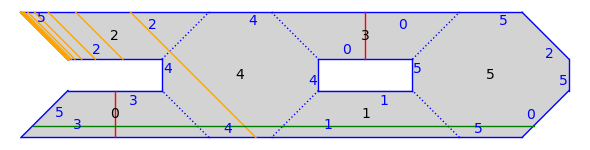

In [91]:
# Here's a trajectory:

v1 = S.tangent_vector(0, (1/2,3/16), (0,1))
v2 = S.tangent_vector(4, (1+1/4,0), (-1,1))
v3 = S.tangent_vector(0, (1/2,1/16), (1,0))
traj1 = v1.straight_line_trajectory()
traj2 = v2.straight_line_trajectory()
traj3 = v3.straight_line_trajectory()
traj1.flow(100)
traj2.flow(100)
traj3.flow(100)
print('Red is' + (traj1.is_closed()) * ' closed' + (not traj1.is_closed()) * ' open.')
print('Orange is' + (traj2.is_closed()) * ' closed' + (not traj2.is_closed()) * ' open.')
print('Green is' + (traj3.is_closed()) * ' closed' + (not traj3.is_closed()) * ' open.')
S.plot(edge_labels='gluings') + traj1.plot(color='red') + traj2.plot(color='orange') + traj3.plot(color='green')

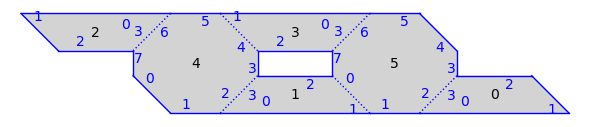

In [9]:
# A base like this has rotational symmetry:

gs.make_adjacent(5,2)
gs.plot()